# 連続体脚の設計

螺旋形状の設定  
→螺旋形状を再現できる脚の設計  
→螺旋の接線ベクトルを計算→それを再現できるかき動作脚の設計  
ふたつを合わせる  

##### 螺旋の式
$x = a * cos(t)$  
$y = a * sin(t)$  
$z = b * t$

## 螺旋の接線
$x = -a*sin(t)$  
$y = a*cos(t)$  
$z = b$

In [7]:
import numpy as np
import plotly.express as px

class Spiral : 
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def spiral_pos(self, t): 
        return {"x":self.a * np.cos(t), "y":self.a * np.sin(t), "z":self.b * t}
    
    def spiral_vector(self, t):
        return {"x":-self.a * np.sin(t), "y":self.a * np.cos(t), "z":self.b}
    
    def spiral_diff(self, t):
        return {"x":(-self.a * np.sin(t))+(self.a * np.cos(t)), "y":(self.a * np.cos(t))+(self.a * np.sin(t)), "z":self.b}


# パラメータ分割数
N = 256

#巻き数
SPRING_NUM = 4

# パラメータtを作成
t_list = np.linspace(0, SPRING_NUM*2*np.pi, N)
spiral = Spiral(1,0.5)

pos_list = spiral.spiral_pos(t_list)
diff_pos = spiral.spiral_diff(0)



fig = px.line_3d(x=pos_list["x"], y=pos_list["y"], z=pos_list["z"], range_x=[-6,6], range_y=[-6,6],range_z=[0,12], template="plotly_white")
#カメラの位置
camera = dict(
    eye=dict(x=2, y=2, z=0.1)
)
fig.update_layout(scene_camera=camera)
fig.show()

## アルキメデスの螺旋
$x = a*t*cos(t)$  
$y = a*t*sin(t)$  
$z = b*t$

## 接線
$x = a*cos(t)-a*t*sin(t)$  
$y = a*sin(t)+a*t*cos(t)$  
$z = b$

In [2]:
#アルキメデスの螺旋
import numpy as np
import plotly.express as px

class Archimedean_Spiral : 
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def spiral_pos(self, t): 
        return {"x":self.a * t * np.cos(t), "y":self.a * t * np.sin(t), "z":self.b * t}
    
    def spiral_vector(self, t):
        return {"x":(self.a * np.cos(t)) - (self.a * t * np.sin(t)), "y": (self.a * np.sin(t))+ (self.a * np.cos(t)), "z":self.b}
    
    

# パラメータ分割数
N = 256

#巻き数
SPRING_NUM = 3


# パラメータtを作成
t_list = np.linspace(0, SPRING_NUM*2*np.pi, N)

spiral = Archimedean_Spiral(1,1)

pos_list = spiral.spiral_pos(t_list)
fig = px.line_3d(x=pos_list["x"], y=pos_list["y"], z=pos_list["z"])
fig.show()

{'x': -2.7203886805697284, 'y': 1.571333773492268, 'z': 1}
{'x': -0.4064540874212802, 'y': 1.366097685884893, 'z': 1}


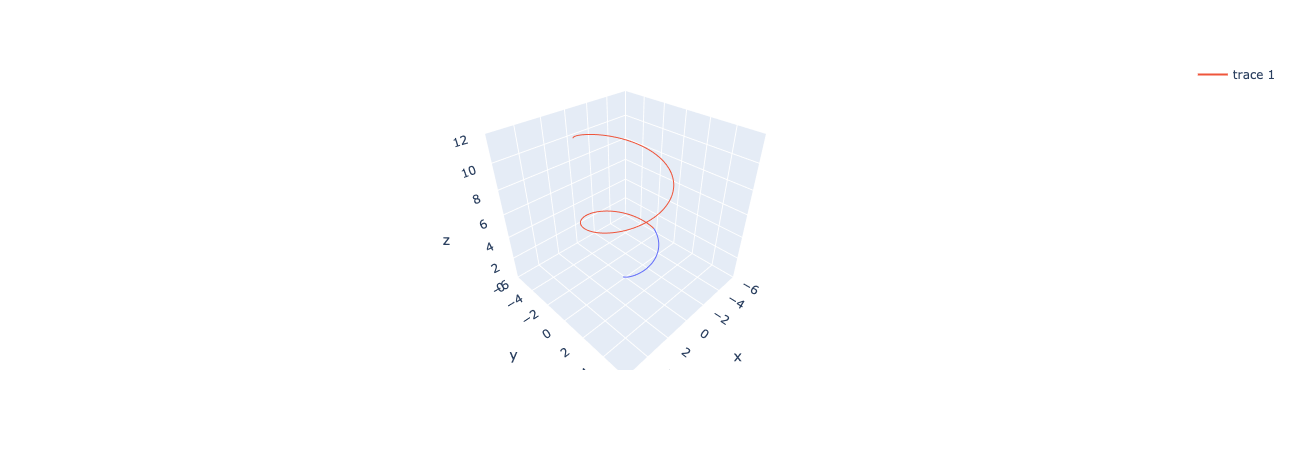

In [492]:
# 連動のテスト
class Spiral : 
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def spiral_pos(self, t): 
        return {"x":self.a * np.cos(t), "y":self.a * np.sin(t), "z":self.b * t}
    
    def spiral_vector(self, t):
        return {"x":-self.a * np.sin(t), "y":self.a * np.cos(t), "z":self.b}

class Archimedean_Spiral : 
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def spiral_pos(self, t): 
        return {"x":self.a * t * np.cos(t), "y":self.a * t * np.sin(t), "z":self.b * t}
    
    def spiral_vector(self, t):
        return {"x":(self.a * np.cos(t)) - (self.a * t * np.sin(t)), "y": (self.a * np.sin(t))+ (self.a * np.cos(t)), "z":self.b}

    
# アルキメデスの螺旋を求める
N = 256

# パラメータtを作成
t_list1 = np.linspace(0, np.pi, N)
t_list2 = np.linspace(np.pi, 4*np.pi, N)

a_spiral = Archimedean_Spiral(1,1)
spiral = Spiral(np.pi,1)

pos_list1 = a_spiral.spiral_pos(t_list1)
print(spiral.spiral_vector(1.047))
print(a_spiral.spiral_vector(1.047))

pos_list2 = spiral.spiral_pos(t_list2)

fig = px.line_3d(x=pos_list1["x"], y=pos_list1["y"], z=pos_list1["z"], range_x=[-6,6], range_y=[-6,6],range_z=[0,12])
fig.add_scatter3d(x=pos_list2["x"], y=pos_list2["y"], z=pos_list2["z"],mode='lines')
fig.update_layout(scene_aspectmode='cube')
fig.show()

## 拡張アルキメデスの螺旋
$x = a * (1 - e^{-kt})cos(t)$    
$y = a * (1 - e^{-kt})sin(t)$  
$z = b*t$  
$(c > 1, k > 0)\ or\ (0 < c < 1, k < 0)$

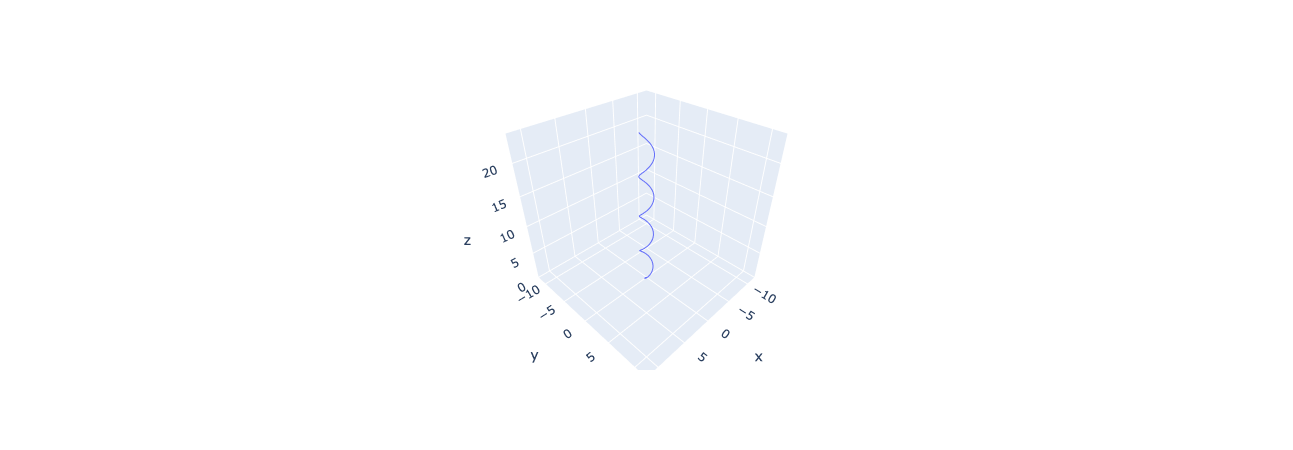

In [511]:
import numpy as np
import plotly.express as px
import math


class Spiral : 
    def __init__(self, a, b, c, k):
        self.a = a
        self.b = b
        self.c = c
        self.k = k

    def spiral_pos(self, t): 
        #print(1-self.c **(-t))
        #print(t)
        return {"x":self.a * (1.0 - self.c **( - self.k * t )) *np.cos(t), "y":self.a * (1.0- self.c ** (- self.k * t)) * np.sin(t), "z":self.b * t}
    
    def spiral_vector(self, t):
        return {"x":-self.a * np.sin(t), "y":self.a * np.cos(t), "z":self.b}
    
    def spiral_diff(self, t):
        return {"x":(-self.a * np.sin(t))+(self.a * np.cos(t)), "y":(self.a * np.cos(t))+(self.a * np.sin(t)), "z":self.b}


# パラメータ分割数
N = 1000

#巻き数
SPRING_NUM = 10

# パラメータtを作成
t_list =  np.linspace(0, SPRING_NUM*2*np.pi, N)
#t_list = np.array([0.0, 0.20095151348868967, 0.5095375413475267, 0.8697058107827615, 1.2294153672883112, 1.5854850248615548, 1.939950571522786, 2.293824458047311, 2.6474893650629383, 3.0010814313754963, 3.354648220283707, 3.7082062507579394, 4.061761247885443, 4.415315194728464, 4.768868777955504, 5.122422235308477, 5.475975649005704, 5.82952904760532, 6.183082440929866, 6.536635832435422, 6.890189223395282, 7.243742613991344, 7.597296004769305, 7.950849395365367, 8.304402785961429, 8.65795617655749, 9.011509567153553, 9.365062957749615, 9.718616348345677, 10.072169738941739])
spiral = Spiral(1.0, 1.0, math.e, 3.0)

pos_list = spiral.spiral_pos(t_list)

diff_pos = spiral.spiral_diff(0)


#print(pos_list)
#df = px.data.gapminder().query("country=='Brazil'")
fig = px.line_3d(x=pos_list["x"], y=pos_list["y"], z=pos_list["z"], range_x=[-12,12], range_y=[-12,12],range_z=[0,24])
#fig.add_scatter3d(x=x2, y=y2, z=z2,mode='lines')
#fig.add_scatter3d(x=x3, y=y3, z=z3,mode='lines')
fig.show()

## 収束アルキメデスの螺旋を弧長パラメータ表示する
$\dfrac{ac^{-kt}}{dt} = -ak\log_{e}(c) * c^{-kt}$

In [43]:
from sympy import *
init_printing()

収束型アルキメデスの螺旋


微分結果


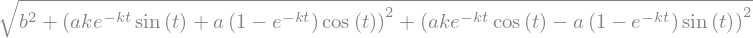

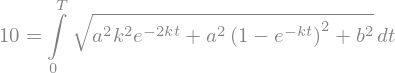

[]


In [55]:
var('a b c t k T')
#a = 1.0
#b = 1.0
#c = E
#k = 3.0
x_t = a * ( 1 - E ** (-k*t) )*cos(t)
y_t = a * ( 1 - E ** (-k*t) )*sin(t)
z_t = b * t
print("収束型アルキメデスの螺旋")
display(x_t, y_t, z_t)
print("微分結果")
x_t_diff = diff(x_t, t, 1)
y_t_diff = diff(y_t, t, 1)
z_t_diff = diff(z_t, t, 1)
display(x_t_diff, y_t_diff, z_t_diff)
L = sqrt((x_t_diff ** 2) + (y_t_diff ** 2) + (z_t_diff ** 2))
display(L)
s_t = integrate(sqrt( b**2 + (a*k*E**(-k*t))**2 + (a*(1-E**(-k*t)))**2 ), (t,0,T))
var('s')
s_t = Eq(10, s_t)
display(s_t)
print(solve(s_t, T))

In [2]:
import math
#s= 20とする

from scipy import integrate

def func(t):
    a = 1.0
    b = 1.0
    k = 3.0
    return math.sqrt( b**2 + (a*k*math.e**(-k*t))**2 + (a*(1-math.e**(-k*t)))**2 )

def func_f(t):
    return integrate.quad(func, 0, t)[0]-20


#二分法（方程式の関数項、探索区間の左端、探索区間の右端、誤差範囲、最大反復回数）
def bisection(func_f, x_min, x_max, error=1e-10, max_loop=100):
    #初期値を表示
    num_calc = 0  #計算回数
    print("{:3d}:  {:.15f} <= x <= {:.15f}".format(num_calc, x_min, x_max))
    print(func_f(x_min))
    print(func_f(x_max))

    #中間値の定理の条件を満たすか調べる
    if(0.0 < func_f(x_min)*func_f(x_max)):
        print("error: Section definition is invalid (0.0 < func_f(x_min)*func_f(x_max)).")
        quit()

    #ずっと繰り返す
    while(True):
        #新たな中間値の計算
        x_mid = (x_max +x_min)/2.0

        #探索区間を更新
        if (0.0 < func_f(x_mid)*func_f(x_max)):  #中間と右端の値が同じの時
            x_max = x_mid  #右端を更新
        else:  #中間と左端の値が同じの時
            x_min = x_mid  #左端を更新

        #結果を表示
        num_calc += 1  #計算回数を数える
        print("{:3d}:  {:.15f} <= x <= {:.15f}".format(num_calc, x_min, x_max))

        #「誤差範囲が一定値以下」または「計算回数が一定値以上」ならば終了
        if((x_max-x_min <= error) or max_loop <= num_calc):
            break

    #最終的に得られた解
    print("x = {:.15f}".format(x_mid))

    return x_mid



In [3]:
solution = bisection(func_f, 0, 100.0)

  0:  0.000000000000000 <= x <= 100.000000000000000
-20.0
121.67715719006563
  1:  0.000000000000000 <= x <= 50.000000000000000
  2:  0.000000000000000 <= x <= 25.000000000000000
  3:  12.500000000000000 <= x <= 25.000000000000000
  4:  12.500000000000000 <= x <= 18.750000000000000
  5:  12.500000000000000 <= x <= 15.625000000000000
  6:  12.500000000000000 <= x <= 14.062500000000000
  7:  13.281250000000000 <= x <= 14.062500000000000
  8:  13.671875000000000 <= x <= 14.062500000000000
  9:  13.867187500000000 <= x <= 14.062500000000000
 10:  13.867187500000000 <= x <= 13.964843750000000
 11:  13.916015625000000 <= x <= 13.964843750000000
 12:  13.940429687500000 <= x <= 13.964843750000000
 13:  13.952636718750000 <= x <= 13.964843750000000
 14:  13.958740234375000 <= x <= 13.964843750000000
 15:  13.958740234375000 <= x <= 13.961791992187500
 16:  13.960266113281250 <= x <= 13.961791992187500
 17:  13.961029052734375 <= x <= 13.961791992187500
 18:  13.961029052734375 <= x <= 13.96141

In [8]:
integrate.quad(func, 0.0, 13.961257035316521)[0]

19.999999999877716

In [229]:
from scipy.integrate import quad 
from sympy import *
import math
init_printing()

class MyCurve:
    def __init__(self, a=1.0, b=1.0, k=3.0):
        self.a = a
        self.b = b
        self.k = k
        self.u = Symbol('u')
        self.error = 1e-10
        self.max_loop=1000
        self.X = [self.b*self.u, self.a * ( 1 - math.e ** (-self.k*self.u) )*cos(self.u), self.a * ( 1 - math.e ** (-self.k*self.u) )*sin(self.u)]
        self.X_diff1 = self.func_diff(self.X, 1)
        self.X_diff2 = self.func_diff(self.X_diff1, 1)
        self.X_diff3 = self.func_diff(self.X_diff2, 1)
     
    def func_diff(self, func_list, diff_num):
        result_list = []
        for func in func_list:
            result_list.append(diff(func, self.u, diff_num))
            
        return result_list
    
    def func_evalf(self, func_list, num_list):
        result_list = []
        for i in range(len(func_list)):
            result_list.append(func_list[i].subs(self.u, num_list[i]).evalf())
        return result_list
        
    def _func_L(self, t):
        #return math.sqrt( self.b**2 + (self.a*self.k*math.e**(-self.k*t))**2 + (self.a*(1.0-math.e**(-self.k*t)))**2 )
        _L = np.array(self.func_evalf(self.X_diff1, [t]*3)).astype(np.float64)
        return np.linalg.norm(_L)

    #s_tを求める
    def func_s_t(self, t, target):
        return quad(self._func_L, 0, t)[0]-target
    
    #s_t→t_sの変換(sを満たすtの値を求める)
    def bisection(self, x_min, x_max, target):
        #初期値を表示
        num_calc = 0  #計算回数
        #print("{:3d}:  {:.15f} <= x <= {:.15f}".format(num_calc, x_min, x_max))
        
        #中間値の定理の条件を満たすか調べる
        if(0.0 < self.func_s_t(x_min, target)*self.func_s_t(x_max, target)):
            #print("error: Section definition is invalid (0.0 < func_f(x_min)*func_f(x_max)).")
            quit()

        #ずっと繰り返す
        while(True):
            #新たな中間値の計算
            x_mid = (x_max +x_min)/2.0

            #探索区間を更新
            if (0.0 < self.func_s_t(x_mid, target)*self.func_s_t(x_max, target)):  #中間と右端の値が同じの時
                x_max = x_mid  #右端を更新
            else:  #中間と左端の値が同じの時
                x_min = x_mid  #左端を更新

            #結果を表示
            num_calc += 1  #計算回数を数える
            #print("{:3d}:  {:.15f} <= x <= {:.15f}".format(num_calc, x_min, x_max))

            #「誤差範囲が一定値以下」または「計算回数が一定値以上」ならば終了
            if((x_max-x_min <= self.error) or self.max_loop <= num_calc):
                break

        #最終的に得られた解
        #print("x = {:.15f}".format(x_mid))

        return x_mid
    
    #曲率と捩率を求める
    def calc_curvature_torsion(self, t):
        x_d = self.func_evalf(self.X_diff1, [t,t,t])
        x_dd = self.func_evalf(self.X_diff2, [t,t,t])
        x_ddd = self.func_evalf(self.X_diff3, [t, t, t])
        #print(x_d)
        #print(x_dd)
        #print(x_ddd)
        curv = self.curvature(x_d, x_dd)
        tor = self.torsion(x_d, x_dd, x_ddd)
        #print(curv, tor)
        return curv, tor
        
    
    #曲率を求める
    def curvature(self, x_d, x_dd):
        #分子
        k_numer = ( ((x_d[1]*x_dd[2] - x_d[2]*x_dd[1])**2) + ((x_d[2]*x_dd[0] - x_d[0]*x_dd[2])**2) + ((x_d[0]*x_dd[1] - x_d[1]*x_dd[0])**2) )**0.5
        #分母
        k_denom = (x_d[0]**2 + x_d[1]**2 + x_d[2]**2)**(3/2)
        return k_numer / k_denom

    
    #捩率を求める
    def torsion(self, x_d, x_dd, x_ddd):
        #分子
        tou_numer = (x_ddd[0]*(x_d[1]*x_dd[2] - x_d[2]*x_dd[1])) + (x_ddd[1]*(x_d[2]*x_dd[0] - x_d[0]*x_dd[2])) + (x_ddd[2]*(x_d[0]*x_dd[1] - x_d[1]*x_dd[0]))
        tou_denom = (x_d[1]*x_dd[2] - x_d[2]*x_dd[1])**2 + (x_d[2]*x_dd[0] - x_d[0]*x_dd[2])**2 + (x_d[0]*x_dd[1] - x_d[1]*x_dd[0])**2
        return tou_numer / tou_denom




In [130]:
curve = MyCurve()
print(curve.X)
print(curve.calc_curvature_torsion(0))
init_pos = np.array([float(curve.X_diff1[0].subs(curve.u, 0)), float(curve.X_diff1[1].subs(curve.u, 0)), float(curve.X_diff1[2].subs(curve.u, 0)) ])
print(init_pos)
init_pos_norm = np.linalg.norm(init_pos)
init_pos_normed = init_pos/init_pos_norm
print(init_pos_normed*0.05)

[1.0*u, (1.0 - 1.0*2.71828182845905**(-3.0*u))*cos(u), (1.0 - 1.0*2.71828182845905**(-3.0*u))*sin(u)]
(0.664078308635360, 0.306122448979592)
[1. 3. 0.]
[0.01581139 0.04743416 0.        ]


In [144]:
import numpy as np
import plotly.express as px

class MyLeg:
    def __init__(self, link_length, joint_num, curve):
        self.link_length = link_length
        self.joint_num = joint_num
        self.curve = curve
        self.trans_matrix_list = []
        self.link_vec_list = []
        self.yaw_list = []
        self.roll_list = []
        self.t_list = []
        
    def calc_joint_angle(self):
        self.yaw_list = []
        self.roll_list = []
        self.t_list = []
        for i in range(self.joint_num):
            t = self.curve.bisection(-100, 100, (i+1)*self.link_length)
            self.t_list.append(t)
            curv, tor = self.curve.calc_curvature_torsion(t)
            #print(curv, tor)
            self.yaw_list.append(curv*self.link_length)
            self.roll_list.append(tor*self.link_length)
    
    
    def calc_transform(self, yaw, roll):
        joint1 = self.calc_joint1(yaw)
        joint2 = self.calc_joint2(roll)
        return joint2.dot(joint1)
        
    #yaw軸
    def calc_joint1(self, s):
        #s = -s
        #return np.array([[1, 0, 0], [0, math.cos(s), -math.sin(s)],[0, math.sin(s), math.cos(s)]])
        #return np.array([[math.cos(s), 0, math.sin(s)],[0,1,0],[-math.sin(s), 0, math.cos(s)]])
        return np.array([[math.cos(s), -math.sin(s), 0],[math.sin(s), math.cos(s), 0],[0, 0, 1]])
        
    #roll軸
    def calc_joint2(self, s):
        #return np.array([[math.cos(s), -math.sin(s), 0],[math.sin(s), math.cos(s), 0],[0, 0, 1]])
        return np.array([[1, 0, 0], [0, math.cos(s), -math.sin(s)],[0, math.sin(s), math.cos(s)]])
    
    def calc_link(self):
        self.trans_matrix_list = []
        #self.link_vec_list = [np.array([[0],[0],[0]], )]
        self.link_vec_list = [np.array([[0],[0],[0]]), np.array([[0.01581139],[0.04743416],[0]])]
        #link_vec = np.array([[self.link_length],[0],[0]])

        for i in range(self.joint_num):
            self.trans_matrix_list.append(self.calc_transform(self.yaw_list[i], self.roll_list[i]))
            #回転
            #_link_vec_buf = np.array([[self.link_length],[0],[0]])
            _link_vec_buf = np.array([[0.01581139],[0.04743416],[0]])
            for j in range(len(self.trans_matrix_list)):
                _link_vec_buf = self.trans_matrix_list[j].dot(_link_vec_buf)
                #補正
                
            #_link_vec_buf = self.calc_joint2(-0.785398).dot(_link_vec_buf)
                
            self.link_vec_list.append(_link_vec_buf+self.link_vec_list[-1])
    
    def calc_link2(self):
        self.link_vec_list = [np.array([[0],[0],[0]]), np.array([[0.01581139],[0.04743416],[0]])]
        for i in range(self.joint_num):
            _link_vec_buf = np.array([[0.01581139],[0.04743416],[0]])
            _link_vec_buf = self.calc_joint2(sum(self.roll_list[0:i+1])).dot(self.calc_joint1(sum(self.yaw_list[0:i+1]))).dot(_link_vec_buf)
            self.link_vec_list.append(_link_vec_buf+self.link_vec_list[-1])
            
    def show(self):
        x_list = [vec[0][0] for vec in self.link_vec_list]
        y_list = [vec[1][0] for vec in self.link_vec_list]
        z_list = [vec[2][0] for vec in self.link_vec_list]
        #print(x_list)
        #print(y_list)
        #print(z_list)
        fig = px.line_3d(x=x_list, y=y_list, z=z_list)#, range_x=[-12,12], range_y=[-12,12],range_z=[0,24])
        fig.update_layout(scene_aspectmode='cube')
        
        fig.show()
        
    

In [369]:
from scipy.integrate import quad 
from sympy import *
import math
init_printing()

class MyCurve:
    def __init__(self, a=1.0, b=1.0, k=3.0):
        self.a = a
        self.b = b
        self.k = k
        self.u = Symbol('u')
        self.error = 1e-10
        self.max_loop=1000
        self.X = [self.b*self.u, self.a * ( 1 - math.e ** (-self.k*self.u) )*cos(self.u), self.a * ( 1 - math.e ** (-self.k*self.u) )*sin(self.u)]
        self.X_diff1 = self.func_diff(self.X, 1)
        self.X_diff2 = self.func_diff(self.X_diff1, 1)
        self.X_diff3 = self.func_diff(self.X_diff2, 1)
     
    def func_diff(self, func_list, diff_num):
        result_list = []
        for func in func_list:
            result_list.append(diff(func, self.u, diff_num))
            
        return result_list
    
    def func_evalf(self, func_list, num_list):
        result_list = []
        for i in range(len(func_list)):
            result_list.append(func_list[i].subs(self.u, num_list[i]).evalf())
        return result_list
        
    def _func_L(self, t):
        return math.sqrt( self.b**2 + (self.a*self.k*math.e**(-self.k*t))**2 + (self.a*(1.0-math.e**(-self.k*t)))**2 )
        #_L = np.array(self.func_evalf(self.X_diff1, [t]*3)).astype(np.float64)
        #return np.linalg.norm(_L)

    #s_tを求める
    def func_s_t(self, t, target):
        return quad(self._func_L, 0, t)[0]-target
    
    #s_t→t_sの変換(sを満たすtの値を求める)
    def bisection(self, x_min, x_max, target):
        #初期値を表示
        num_calc = 0  #計算回数
        #print("{:3d}:  {:.15f} <= x <= {:.15f}".format(num_calc, x_min, x_max))
        
        #中間値の定理の条件を満たすか調べる
        if(0.0 < self.func_s_t(x_min, target)*self.func_s_t(x_max, target)):
            #print("error: Section definition is invalid (0.0 < func_f(x_min)*func_f(x_max)).")
            quit()

        #ずっと繰り返す
        while(True):
            #新たな中間値の計算
            x_mid = (x_max +x_min)/2.0

            #探索区間を更新
            if (0.0 < self.func_s_t(x_mid, target)*self.func_s_t(x_max, target)):  #中間と右端の値が同じの時
                x_max = x_mid  #右端を更新
            else:  #中間と左端の値が同じの時
                x_min = x_mid  #左端を更新

            #結果を表示
            num_calc += 1  #計算回数を数える
            #print("{:3d}:  {:.15f} <= x <= {:.15f}".format(num_calc, x_min, x_max))

            #「誤差範囲が一定値以下」または「計算回数が一定値以上」ならば終了
            if((x_max-x_min <= self.error) or self.max_loop <= num_calc):
                break

        #最終的に得られた解
        #print("x = {:.15f}".format(x_mid))

        return x_mid
    
    #曲率と捩率を求める
    def calc_curvature_torsion(self, t):
        x_d = self.func_evalf(self.X_diff1, [t,t,t])
        x_dd = self.func_evalf(self.X_diff2, [t,t,t])
        x_ddd = self.func_evalf(self.X_diff3, [t, t, t])
        #print(x_d)
        #print(x_dd)
        #print(x_ddd)
        curv = self.curvature(x_d, x_dd)
        tor = self.torsion(x_d, x_dd, x_ddd)
        #print(curv, tor)
        return curv, tor
        
    
    #曲率を求める
    def curvature(self, x_d, x_dd):
        #分子
        k_numer = ( ((x_d[1]*x_dd[2] - x_d[2]*x_dd[1])**2) + ((x_d[2]*x_dd[0] - x_d[0]*x_dd[2])**2) + ((x_d[0]*x_dd[1] - x_d[1]*x_dd[0])**2) )**0.5
        #分母
        k_denom = (x_d[0]**2 + x_d[1]**2 + x_d[2]**2)**(3/2)
        return k_numer / k_denom

    
    #捩率を求める
    def torsion(self, x_d, x_dd, x_ddd):
        #分子
        tou_numer = (x_ddd[0]*(x_d[1]*x_dd[2] - x_d[2]*x_dd[1])) + (x_ddd[1]*(x_d[2]*x_dd[0] - x_d[0]*x_dd[2])) + (x_ddd[2]*(x_d[0]*x_dd[1] - x_d[1]*x_dd[0]))
        tou_denom = (x_d[1]*x_dd[2] - x_d[2]*x_dd[1])**2 + (x_d[2]*x_dd[0] - x_d[0]*x_dd[2])**2 + (x_d[0]*x_dd[1] - x_d[1]*x_dd[0])**2
        return tou_numer / tou_denom
    
    def _calc_deg_integer_curv(self, s):
        t = self.bisection(-100, 100, s)
        x_d = self.func_evalf(self.X_diff1, [t,t,t])
        x_dd = self.func_evalf(self.X_diff2, [t,t,t])
        return self.curvature(x_d, x_dd)
        
        
    def _calc_deg_integer_tor(self, s):
        t = self.bisection(-100, 100, s)
        x_d = self.func_evalf(self.X_diff1, [t,t,t])
        x_dd = self.func_evalf(self.X_diff2, [t,t,t])
        x_ddd = self.func_evalf(self.X_diff3, [t,t,t])
        return self.torsion(x_d, x_dd, x_ddd)
        
    def calc_deg_integer(self, s_min, s_max):
        curv_deg = quad(self._calc_deg_integer_curv, s_min, s_max)[0]
        tor_deg = quad(self._calc_deg_integer_tor, s_min, s_max)[0]
        return curv_deg, tor_deg


In [441]:
import numpy as np
import plotly.express as px
from scipy.spatial.transform import Rotation
import pandas as pd


class MyLeg2:
    def __init__(self, link_length, joint_num, curve):
        self.link_length = link_length
        self.joint_num = joint_num
        self.curve = curve
        self.link_vec_list = []
        self.yaw_list = []
        self.roll_list = []
        self.frenet_serrent_er = []
        self.frenet_serrent_ey = []
        self.t_list = []
        
        er, ey = self.calc_frenet_serret(0)
        self.frenet_serrent_er.append(er)
        self.frenet_serrent_ey.append(ey)
    
    def calc_frenet_serret(self, t):
        er = np.array(self.curve.func_evalf(self.curve.X_diff1, [t]*3)).astype(np.float64)
        er = er/np.linalg.norm(er)
        
        ep = np.array(self.curve.func_evalf(self.curve.X_diff2, [t]*3)).astype(np.float64)
        ep = ep/np.linalg.norm(ep)
        
        ey = np.cross(er, ep)
        #print(er, ey)
        #return (er/np.linalg.norm(er))
        return er, ey
        
        
    def calc_link(self):
        self.yaw_list = []
        self.roll_list = []
        self.t_list = []
        self.link_vec_list = [np.array([0,0,0])]
        
        for i in range(self.joint_num):
            #print(i)
            t = self.curve.bisection(-100, 100, (i)*self.link_length)
            self.t_list.append(t)
            curv, tor = self.curve.calc_curvature_torsion(t)
            self.yaw_list.append(curv*self.link_length)
            self.roll_list.append(tor*self.link_length)
            

            #er軸周りの回転
            rot_er = Rotation.from_rotvec(self.frenet_serrent_er[-1]*self.roll_list[-1])
            self.frenet_serrent_ey.append(rot_er.apply(self.frenet_serrent_ey[-1]))
            
            
            #ey軸周りの回転
            rot_ey = Rotation.from_rotvec(self.frenet_serrent_ey[-1]*self.yaw_list[-1])
            self.frenet_serrent_er.append(rot_ey.apply(self.frenet_serrent_er[-1]))
            

            #print(t)
            #print("real フレネセレ")
            #print(self.calc_frenet_serret(t))
            #print("link フレネセレ")
            #print(self.frenet_serrent_er[-1], self.frenet_serrent_ey[-1])
            
            self.link_vec_list.append( self.link_vec_list[-1] + (self.frenet_serrent_er[-1]*self.link_length) )
            
    def calc_link2(self):
        self.yaw_list = []
        self.roll_list = []
        self.t_list = []
        self.link_vec_list = [np.array([0,0,0])]
        
        for i in range(self.joint_num):
            #print(i)
            t = self.curve.bisection(-100, 100, (i)*self.link_length)
            self.t_list.append(t)
            curv_deg, tor_deg = self.curve.calc_deg_integer( ((i*self.link_length) - (self.link_length/2.0)), ((i*self.link_length) + (self.link_length/2.0)))
            #curv_deg, tor_deg = self.curve.calc_deg_integer( (i*self.link_length), ((i*self.link_length) + (self.link_length)))       
            #print(curv_deg, tor_deg)
            self.yaw_list.append(curv_deg)
            self.roll_list.append(tor_deg)
            
            #er軸周りの回転
            rot_er = Rotation.from_rotvec(self.frenet_serrent_er[-1]*self.roll_list[-1])
            self.frenet_serrent_ey.append(rot_er.apply(self.frenet_serrent_ey[-1]))
            
            
            #ey軸周りの回転
            rot_ey = Rotation.from_rotvec(self.frenet_serrent_ey[-1]*self.yaw_list[-1])
            self.frenet_serrent_er.append(rot_ey.apply(self.frenet_serrent_er[-1]))
            

            #print(t)
            #print("real フレネセレ")
            #print(self.calc_frenet_serret(t))
            #print("link フレネセレ")
            #print(self.frenet_serrent_er[-1], self.frenet_serrent_ey[-1])
            
            self.link_vec_list.append( self.link_vec_list[-1] + (self.frenet_serrent_er[-1]*self.link_length) )
    
    #初期の姿勢を実現する回転角度を求める

    def show(self):
        x_list = [vec[0] for vec in self.link_vec_list]
        y_list = [vec[1] for vec in self.link_vec_list]
        z_list = [vec[2] for vec in self.link_vec_list]
        data_dict = {"link_x":x_list, "link_y":y_list, "link_z":z_list}
        #print(x_list)
        #print(y_list)
        #print(z_list)
        df = pd.DataFrame(dict(
            X=x_list, 
            Y=y_list, 
            Z=z_list,
            color=["a"]*len(x_list)
        ))

        
        fig = px.line_3d(df, x="X", y="Y", z="Z", color="color", range_x=[0,24], range_y=[-12,12],range_z=[-12,12])
        fig.update_layout(scene_aspectmode='cube')
        
        fig.show()


In [417]:
def show(leg):
    x_list = [vec[0] for vec in leg.link_vec_list]
    y_list = [vec[1] for vec in leg.link_vec_list]
    z_list = [vec[2] for vec in leg.link_vec_list]
    #print(x_list)
    #print(y_list)
    #print(z_list)
    df = pd.DataFrame(dict(
        X=x_list, 
        Y=y_list, 
        Z=z_list,
        color=["a"]*len(x_list)
    ))
    
    
    spiral = Spiral(leg.curve.a, leg.curve.b, math.e, leg.curve.k)

    pos_list = spiral.spiral_pos(np.array(leg.t_list))
    real_x_list = pos_list["z"]
    real_y_list = pos_list["x"]
    real_z_list = pos_list["y"]
    df2 = pd.DataFrame(dict(
        X=real_x_list, 
        Y=real_y_list, 
        Z=real_z_list,
        color=["b"]*len(real_x_list)
    ))
    df = pd.concat([df, df2])
    
    fig = px.line_3d(df, x="X", y="Y", z="Z", color="color", range_x=[0,0.30], range_y=[-0.15, 0.15],range_z=[-0.15, 0.15])
    fig.update_layout(scene_aspectmode='cube')
        
    fig.show()

In [519]:
curve = MyCurve(a=0.04, b=0.03, k=0.8)
myleg2 = MyLeg2(0.02, 35, curve)
myleg2.calc_link()

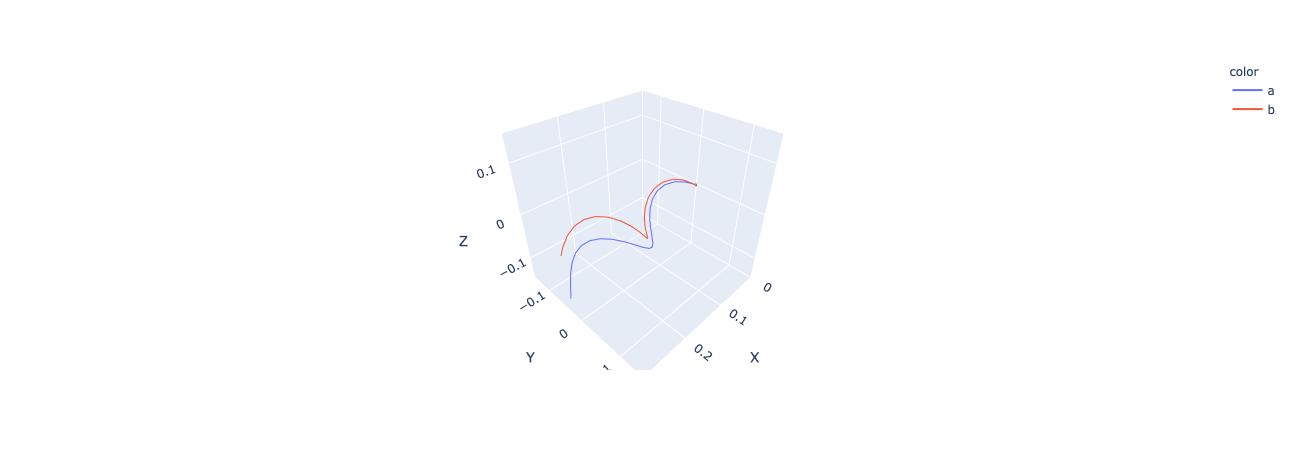

In [520]:
show(myleg2)

curve = MyCurve(a=0.04, b=0.03, k=0.8)
myleg2 = MyLeg2(0.02, 35, curve)
myleg2.calc_link()### 考察
kの値が小さい→根本の屈曲の近似性能が高い→ほぼ綺麗に近似できる


kの値が大きい→根本の屈曲の近似性能が低い→大きな誤差がでる

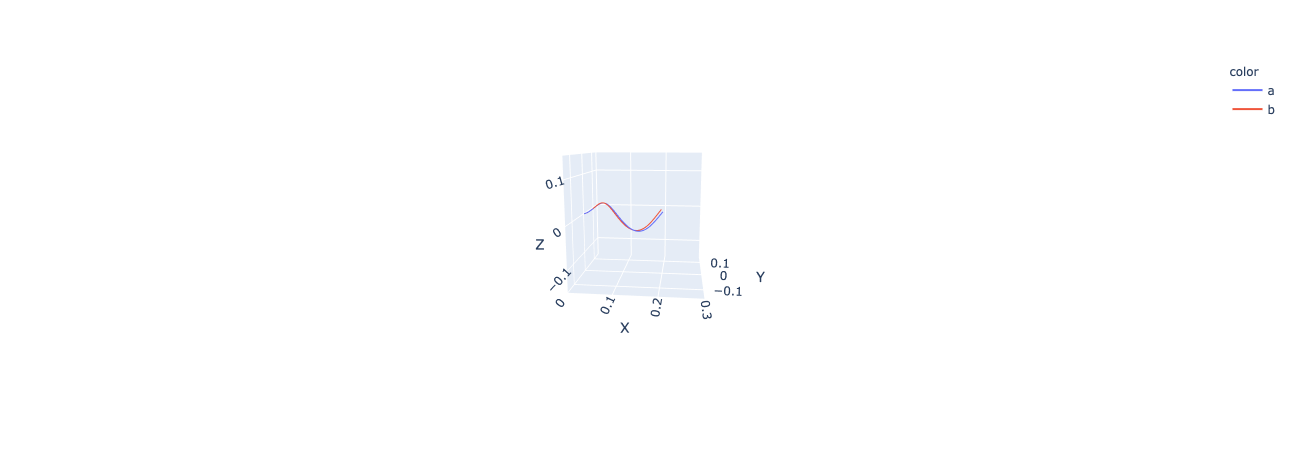

In [510]:
curve = MyCurve(a=0.04, b=0.03, k=0.8)
myleg2 = MyLeg2(0.001, 300, curve)
myleg2.calc_link()
show(myleg2)

In [521]:
myleg3 = MyLeg2(0.001, 300, curve)
myleg3.calc_link()

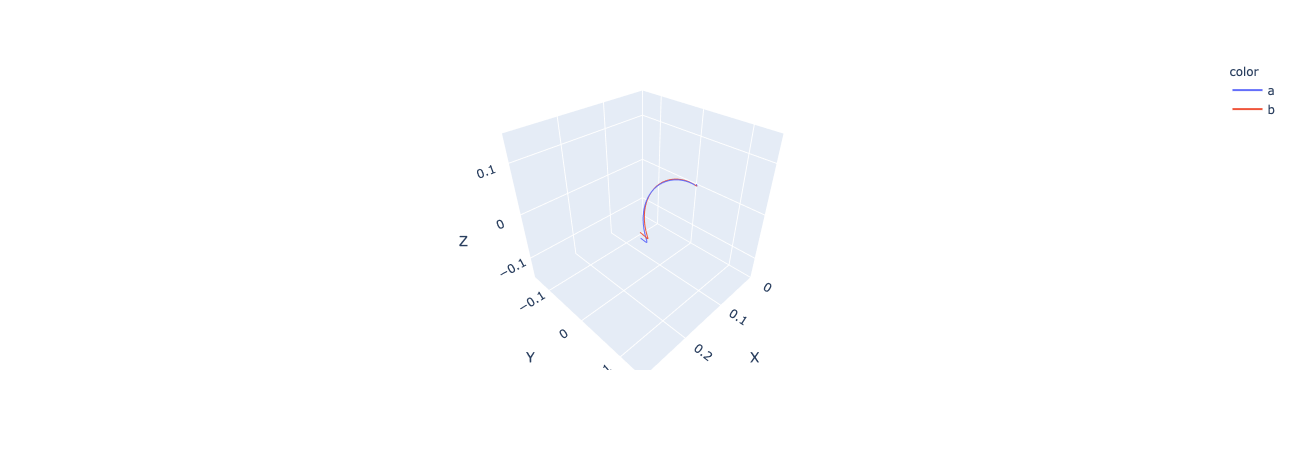

In [522]:
show(myleg3)

## 連続曲線の線分近似 part1

ikを使った近似

In [10]:
from scipy.integrate import quad 
import numpy as np
from sympy import *
import math
init_printing()
import plotly.express as px

class Spiral : 
    def __init__(self, a, b, k):
        self.a = a
        self.b = b
        self.c = math.e
        self.k = k

    def spiral_pos(self, t): 
        #print(1-self.c **(-t))
        #print(t)
        #return {"x":self.a * (1.0 - self.c **( - self.k * t )) *np.cos(t), "y":self.a * (1.0- self.c ** (- self.k * t)) * np.sin(t), "z":self.b * t}
        return np.array([ (self.a * (1.0 - self.c **( - self.k * t )) *np.cos(t)), self.a * (1.0- self.c ** (- self.k * t)) * np.sin(t), self.b * t])
    def spiral_vector(self, t):
        return {"x":-self.a * np.sin(t), "y":self.a * np.cos(t), "z":self.b}
    
    def spiral_diff(self, t):
        return {"x":(-self.a * np.sin(t))+(self.a * np.cos(t)), "y":(self.a * np.cos(t))+(self.a * np.sin(t)), "z":self.b}

In [11]:

class subProblem1:
    def __init__(self, curve, dt, link_list):
        self.curve = curve
        self.dt = dt
        self.t_list = [0]
        self.link_list = link_list
    
    #s_t→t_sの変換(sを満たすtの値を求める)
    def bisection(self, t_max, t_min, target):
        t_j = t_min
        while True:
            t_mid = (t_max + t_min)/2.0
            #t_mid = (t_max - t_min)/2
            #print("max:",t_max, "mid:",t_mid,"t_min:",t_min)
            _calcL = self.euclid(t_mid, t_j)
            #print(_calcL)
            if( abs(_calcL - target) <= 0.001 ):
                return t_mid
            
            if( _calcL < target ):
                t_min = t_mid
            else:
                t_max = t_mid
    
    def euclid(self, t, tj):
        return np.linalg.norm(self.curve.spiral_pos(t) - self.curve.spiral_pos(tj))
    
    def calc_t(self):
        for j in range( len(self.link_list) ):
            tj = self.t_list[-1]
            t = tj + self.dt
            
            while True:
                if(self.euclid(t, tj) >= self.link_list[j]):
                    break
                t += self.dt
            
            #二分探査
            #print("tj,t: ", tj, " , ",t)
            result_t = self.bisection(t, tj, self.link_list[j])
            #print("result t: ",t)
            
            self.t_list.append(result_t)

In [12]:
spiral = Spiral(1, 1, 0.8)

In [7]:
subproblem1 = subProblem1(spiral, 0.001, [0.1,0.1,0.1,0.1,0.1,0.1])
subproblem1.calc_t()

In [8]:
print(subproblem1.t_list)

[0, 0.07875000000000006, 0.15911718750000012, 0.2408203125000002, 0.32350781250000027, 0.4068515625000003, 0.4905234375000004]


In [211]:
spiral = Spiral(1, 1, 0.8)
subproblem1 = subProblem1(spiral, 0.001, [1.0,1.0,1.0,1.0,1.0,1.0])
subproblem1.calc_t()
print(subproblem1.t_list)


t_list = np.linspace(0, 20, 200)
pos_list1 = {"x":[], "y":[], "z":[]}
pos_list2 = {"x":[], "y":[], "z":[]}
for t in t_list:
    pos = spiral.spiral_pos(t)
    pos_list1["x"].append(pos[0])
    pos_list1["y"].append(pos[1])
    pos_list1["z"].append(pos[2])

for t in subproblem1.t_list:
    pos = spiral.spiral_pos(t)
    pos_list2["x"].append(pos[0])
    pos_list2["y"].append(pos[1])
    pos_list2["z"].append(pos[2])

fig = px.line_3d(x=pos_list1["x"], y=pos_list1["y"], z=pos_list1["z"], range_x=[-6,6], range_y=[-6,6],range_z=[0,12])
fig.add_scatter3d(x=pos_list2["x"], y=pos_list2["y"], z=pos_list2["z"])
fig.update_layout(scene_aspectmode='cube')
fig.show()

[0, 0.8653066406250006, 1.6994912109374236, 2.4817265624998375, 3.2332558593747547, 3.9685371093746733, 4.694117187499901]


In [52]:
w_z0 = np.array([[0,0,1.0]]).T
w_y0 = np.array([[0,1.0,0]]).T


L1 = np.array([[0,0,1.0]]).T
spiral = Spiral(1, 1, 0.8)
Pd = spiral.spiral_pos(0.8653066406250006).reshape((3,1))
np.cross(w_z0.T, w_y0.T)

alpha = ((w_z0.T.dot(w_y0)).dot(w_y0.T).dot(L1) - w_z0.T.dot(Pd) ) / (((w_z0.T.dot(w_y0))**2) - 1)
alpha = alpha[0][0]
beta = ((w_z0.T.dot(w_y0)).dot(w_z0.T).dot(Pd) - w_y0.T.dot(L1) ) / (((w_z0.T.dot(w_y0))**2) - 1)
beta = beta[0][0]
ganma = np.sqrt((np.linalg.norm(L1)**2) - (alpha**2) - (beta**2) - (2*alpha*beta*(w_z0.T.dot(w_y0))) / (np.linalg.norm(np.cross(w_z0.T, w_y0.T)))**2 )
ganma = ganma[0][0]

print(alpha)
print(beta)
print(ganma)
z = alpha * w_z0 + beta * w_y0 + ganma*(np.cross(w_z0.T, w_y0.T).T)

u = L1
v = z
_u = u - (w_y0.dot(w_y0.T).dot(u))
_v = v - (w_y0.dot(w_y0.T).dot(v))
print(_u)
print(_v)
print(w_y0.T.dot(np.cross(_u.T,_v.T).T))
print(_u.T.dot(_v))

shita_y0 = np.arctan2(w_y0.T.dot(np.cross(_u.T,_v.T).T), _u.T.dot(_v))
print(shita_y0)

u = Pd
v = z
w_z0 = -1*w_z0
_u = u - (w_z0.dot(w_z0.T).dot(u))
_v = v - (w_z0.dot(w_z0.T).dot(v))

shita_z0 = np.arctan2(w_z0.T.dot(np.cross(_u.T,_v.T).T), _u.T.dot(_v))
print(shita_z0)


0.8653066406250006
-0.0
0.5012428729570886
[[0.]
 [0.]
 [1.]]
[[-0.50124287]
 [ 0.        ]
 [ 0.86530664]]
[[-0.50124287]]
[[0.86530664]]
[[-0.52503452]]
[[-2.27628601]]


In [197]:
def padenKahanSubproblem2(w1, w2, p, q, r):
    #w_z0 = w1
    #w_y0 = w2
    #p = L1
    #q = Pd
    p = p -r
    q = q -r
    alpha = ((w1.T.dot(w2)).dot(w2.T).dot(p) - w1.T.dot(q) ) / (((w1.T.dot(w2))**2) - 1)
    alpha = alpha[0][0]
    beta = ((w1.T.dot(w2)).dot(w1.T).dot(q) - w2.T.dot(p) ) / (((w1.T.dot(w2))**2) - 1)
    beta = beta[0][0]
    ganma = (np.linalg.norm(p)**2) - (alpha**2) - (beta**2) - (2*alpha*beta*(w1.T.dot(w2))) / (np.linalg.norm(np.cross(w1.T, w2.T)))**2
    ganma = np.sqrt(ganma)
    ganma = ganma[0][0]
    z = alpha * w_z0 + beta * w_y0 + ganma*(np.cross(w_z0.T, w_y0.T).T)
    
    u = p
    v = z
    _u = u - (w2.dot(w2.T).dot(u))
    _v = v - (w2.dot(w2.T).dot(v))
    shita_y = np.arctan2(w2.T.dot(np.cross(_u.T,_v.T).T), _u.T.dot(_v))
    
    u = q
    _w1 = -1*w1
    _u = u - (_w1.dot(_w1.T).dot(u))
    _v = v - (_w1.dot(_w1.T).dot(v))

    shita_z = np.arctan2(_w1.T.dot(np.cross(_u.T,_v.T).T), _u.T.dot(_v))
    
    return [shita_z[0][0], shita_y[0][0]]


#ベクトルから歪対称行列を求める
def vec2skew(vec):
    return np.array([[0, -vec[2], vec[1]], 
                     [vec[2], 0, -vec[0]], 
                     [-vec[1], vec[0], 0]])
    
#歪対称行列からベクトルを求める
def skew2vec(skew_matrix):
    return np.array([skew_matrix[2][1], skew_matrix[0][2], skew_matrix[1][0]])


def make_twist(w, q):
    v = np.cross(-w.T,q.T).T
    #print(v)
    #print(w.reshape(1,3))
    twist = np.block([[vec2skew(w.reshape(1,3)[0]), v],[0,0,0,0]])
    #print(twist)
    return twist

def make_g0(L):
    return np.array([[1,0,0,0],
                     [0,1,0,0],
                     [0,0,1,L],
                     [0,0,0,1]])


In [171]:
w_z0 = np.array([[0,0,1.0]]).T
w_y0 = np.array([[0,1.0,0]]).T
q = np.array([[0,0,0]]).T

L1 = np.array([[0,0,1.0]]).T
spiral = Spiral(1, 1, 0.8)
Pd = spiral.spiral_pos(0.8653066406250006).reshape((3,1))

shita = padenKahanSubproblem2(w_z0, w_y0, L1, Pd)
print(shita)



TypeError: padenKahanSubproblem2() missing 1 required positional argument: 'r'

In [188]:
from scipy.linalg import logm, expm

spiral = Spiral(1, 1, 0.8)
subproblem1 = subProblem1(spiral, 0.001, [1.0,1.0,1.0,1.0,1.0,1.0])
subproblem1.calc_t()
print(subproblem1.t_list)

w_z0 = np.array([[0,0,1.0]]).T
w_y0 = np.array([[0,1.0,0]]).T
q = np.array([[0,0,0]]).T

L1 = np.array([[0,0,1.0]]).T
Pd = spiral.spiral_pos(subproblem1.t_list[1]).reshape((3,1))
print("###1")
print(w_z0)
print(w_y0)
print(L1)
print(Pd)
shita_0 = padenKahanSubproblem2(w_z0, w_y0, L1, Pd, q)
print("shita_0:",shita_0)

e_z0 = expm(make_twist(w_z0, q)*shita_0[0])
e_y0 = expm(make_twist(w_y0, q)*shita_0[1])
print(e_z0)
print(e_y0)
print(Pd)
print(e_z0.dot(e_y0).dot(np.block([[L1],[1]]) ))
print(e_z0.dot(e_y0))

w_z1 = np.array([[0,0,1.0]]).T
w_y1 = np.array([[0,1.0,0]]).T
q_1 = np.array([[0,0,1.0]]).T
L2 = np.array([[0,0,1.0]]).T


g_w1 = e_z0.dot(e_y0)
g_12 = make_g0(1.0)

Pd = spiral.spiral_pos(subproblem1.t_list[2]).reshape((3,1))
Pd_ = np.block([[Pd],[1]])
#Pd_ = np.linalg.inv(g_12).dot(np.linalg.inv(g_w1)).dot(Pd_)
Pd_ = np.linalg.inv(g_w1).dot(Pd_)
L2_ = np.block([[L2],[1]])
L2_ = g_12.dot(L2_)
print(q_1_)
print("###2")
print(w_z1)
print(w_y1)
print(L2_)
print(Pd_[:3,:])
shita_1 = padenKahanSubproblem2(w_z1, w_y1, L2_[:3,:], Pd_[:3,:], q_1)
print("shita_1:",shita_1)
e_z1 = expm(make_twist(w_z1, q_1)*shita_1[0])
e_y1 = expm(make_twist(w_y1, q_1)*shita_1[1])
print(e_z1)
print(e_y1)
print(Pd)
print(g_w1.dot(e_z1).dot(e_y1).dot(g_12).dot(np.block([[L2],[1]])))



[0, 0.8653066406250006, 1.6994912109374236, 2.4817265624998375, 3.2332558593747547, 3.9685371093746733, 4.694117187499901]
###1
[[0.]
 [0.]
 [1.]]
[[0.]
 [1.]
 [0.]]
[[0.]
 [0.]
 [1.]]
[[0.32391083]
 [0.38030362]
 [0.86530664]]
shita_0: [-2.2762860129647926, -0.5250345172257952]
[[-0.6484067   0.76129413  0.          0.        ]
 [-0.76129413 -0.6484067  -0.         -0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]
[[ 0.86530664  0.         -0.50124287  0.        ]
 [ 0.          1.          0.          0.        ]
 [ 0.50124287  0.          0.86530664  0.        ]
 [ 0.          0.          0.          1.        ]]
[[0.32391083]
 [0.38030362]
 [0.86530664]]
[[0.32500924]
 [0.38159326]
 [0.86530664]
 [1.        ]]
[[-0.56107063  0.76129413  0.32500924  0.        ]
 [-0.65875286 -0.6484067   0.38159326  0.        ]
 [ 0.50124287  0.          0.86530664  0.        ]
 [ 0.          0.          0.          1.        ]]
[[ 5.

In [189]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib nbagg


def arrow(ax, v, sp, c):
    # 空間座標基準で矢印をプロットする
    # v:ベクトル、sp:始点、c:色
    return ax.quiver(sp[0], sp[1], sp[2],
              v[0]-sp[0], v[1]-sp[1], v[2]-sp[2],
              #length=np.linalg.norm(v),
              color=c, linewidth=1)

In [250]:
from scipy.linalg import logm, expm


spiral = Spiral(1, 1, 0.8)
subproblem1 = subProblem1(spiral, 0.001, [1.0,1.0,1.0,1.0,1.0,1.0])
subproblem1.calc_t()
print(subproblem1.t_list)

w_z0 = np.array([[0,0,1.0]]).T
w_y0 = np.array([[0,1.0,0]]).T
q = np.array([[0,0,0]]).T

L1 = np.array([[0,0,1.0]]).T
Pd = spiral.spiral_pos(subproblem1.t_list[1]).reshape((3,1))
print("###1")
shita_0 = padenKahanSubproblem2(w_z0, w_y0, L1, Pd, q)
print("shita_0:",shita_0)
print("shita_0 deg:", np.rad2deg(shita_0[0]), "," , np.rad2deg(shita_0[1]))
e_z0 = expm(make_twist(w_z0, q)*shita_0[0])
e_y0 = expm(make_twist(w_y0, q)*shita_0[1])
print(Pd)
g_w0 = e_z0.dot(e_y0)
print(g_w0.dot(np.block([[L1],[1]])))




print("###2")
w_z1 = np.array([[0,0,1.0]]).T
w_y1 = np.array([[0,1.0,0]]).T
q_1 = np.array([[0,0,1.0]]).T
L2 = np.array([[0,0,1.0]]).T
g_w1_0 = make_g0(1.0)

Pd = spiral.spiral_pos(subproblem1.t_list[2]).reshape((3,1))
Pd_ = np.block([[Pd],[1]])
Pd_ = np.linalg.inv(g_w0).dot(Pd_)
L2_ = np.block([[L2],[1]])
L2_ = g_w1_0.dot(L2_)

shita_1 = padenKahanSubproblem2(w_z1, w_y1, L2_[:3,:], Pd_[:3,:], q_1)
print("shita_1:",shita_1)
print("shita_1 deg:", np.rad2deg(shita_1[0]), "," , np.rad2deg(shita_1[1]))
e_z1 = expm(make_twist(w_z1, q_1)*shita_1[0])
e_y1 = expm(make_twist(w_y1, q_1)*shita_1[1])
print(Pd)
g_w1 = g_w0.dot(e_z1).dot(e_y1).dot(g_w1_0)
print(g_w1.dot(np.block([[L2],[1]])))


print("###3")
w_z2 = np.array([[0,0,1.0]]).T
w_y2 = np.array([[0,1.0,0]]).T
q_2 = np.array([[0,0,2.0]]).T
L3 = np.array([[0,0,1.0]]).T
g_w2_0 = make_g0(2.0)

Pd = spiral.spiral_pos(subproblem1.t_list[3]).reshape((3,1))
Pd_ = np.block([[Pd],[1]])
Pd_ = g_w1_0.dot(np.linalg.inv(g_w1)).dot(Pd_)
L3_ = np.block([[L3],[1]])
L3_ = g_w2_0.dot(L3_)

shita_2 = padenKahanSubproblem2(w_z2, w_y2, L3_[:3,:], Pd_[:3,:], q_2)
print("shita_2:",shita_2)
print("shita_2 deg:", np.rad2deg(shita_2[0]), "," , np.rad2deg(shita_2[1]))
e_z2 = expm(make_twist(w_z2, q_2)*shita_2[0])
e_y2 = expm(make_twist(w_y2, q_2)*shita_2[1])
print(Pd)
g_w2 = g_w1.dot(np.linalg.inv(g_w1_0)).dot(e_z2).dot(e_y2).dot(g_w2_0)
print(g_w2.dot(np.block([[L3],[1]])))




# プロット
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



##base
O = np.array([0, 0, 0, 1])
e1_O = np.array([1, 0, 0, 1])
e2_O = np.array([0, 1, 0, 1])
e3_O = np.array([0, 0, 1, 1])

arrow(ax, e1_O, O, "r") #x軸方向
arrow(ax, e2_O, O, "g") #y軸方向
arrow(ax, e3_O, O, "b") #z軸方向


#shita0
O_1 = g_w0.dot(O)
e1_1 = g_w0.dot(e1_O)
e2_1 = g_w0.dot(e2_O)
e3_1 = g_w0.dot(e3_O)

arrow(ax, e1_1, O_1, "r") #x軸方向
arrow(ax, e2_1, O_1, "g") #y軸方向
arrow(ax, e3_1, O_1, "b") #z軸方向


#shita1
O_2 = g_w1.dot(O)
e1_2 = g_w1.dot(e1_O)
e2_2 = g_w1.dot(e2_O)
e3_2 = g_w1.dot(e3_O)

arrow(ax, e1_2, O_2, "r") #x軸方向
arrow(ax, e2_2, O_2, "g") #y軸方向
arrow(ax, e3_2, O_2, "b") #z軸方向



ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

[0, 0.8653066406250006, 1.6994912109374236, 2.4817265624998375, 3.2332558593747547, 3.9685371093746733, 4.694117187499901]
###1
shita_0: [{'z': -2.2762860129647926, 'y': -0.5250345172257952}, {'z': 0.8653066406250006, 'y': 0.5250345172257952}]


TypeError: loop of ufunc does not support argument 0 of type dict which has no callable rad2deg method

## Paden-Kahan Subproblemsを利用した曲線近似(ほぼ最終コードまとめ)

### 曲線生成

In [243]:
from scipy.integrate import quad 
import numpy as np
from sympy import *
import math
init_printing()
import plotly.express as px
import matplotlib.pyplot as plot


class Spiral : 
    def __init__(self, a, b, k):
        self.a = a
        self.b = b
        self.c = math.e
        self.k = k

    def spiral_pos(self, t): 
        #print(1-self.c **(-t))
        #print(t)
        #return {"x":self.a * (1.0 - self.c **( - self.k * t )) *np.cos(t), "y":self.a * (1.0- self.c ** (- self.k * t)) * np.sin(t), "z":self.b * t}
        return np.array([ (self.a * (1.0 - self.c **( - self.k * t )) *np.cos(t)), self.a * (1.0- self.c ** (- self.k * t)) * np.sin(t), self.b * t])
    def spiral_vector(self, t):
        return {"x":-self.a * np.sin(t), "y":self.a * np.cos(t), "z":self.b}
    
    def spiral_diff(self, t):
        return {"x":(-self.a * np.sin(t))+(self.a * np.cos(t)), "y":(self.a * np.cos(t))+(self.a * np.sin(t)), "z":self.b}

### 二分探索を利用した線分点生成

In [421]:
class SearchLineSegmentPoints:
    """
    curve: spiral class object
    dt: 1d search accuracy
    link_list: link length list
    """
    def __init__(self, curve, dt, link_list):
        self.curve = curve
        self.dt = dt
        self.t_list = [0]
        self.link_list = link_list
    
    #二分探索
    def bisection(self, t_max, t_min, target):
        t_j = t_min
        counter = 0
        while True:
            t_mid = (t_max + t_min)/2.0
            #t_mid = (t_max - t_min)/2
            #print("max:",t_max, "mid:",t_mid,"t_min:",t_min)
            _calcL = self.euclid(t_mid, t_j)
            #print(_calcL)
            if( (abs(_calcL - target) <= 1e-15)or (counter >= 1000)):
                return t_mid
            
            if( _calcL < target ):
                t_min = t_mid
            else:
                t_max = t_mid
            
            counter += 1
    
    def euclid(self, t, tj):
        return np.linalg.norm(self.curve.spiral_pos(t) - self.curve.spiral_pos(tj))
    
    def calc_t(self):
        for j in range( len(self.link_list) ):
            tj = self.t_list[-1]
            t = tj + self.dt
            
            while True:
                if(self.euclid(t, tj) >= self.link_list[j]):
                    break
                t += self.dt
            
            #二分探査
            result_t = self.bisection(t, tj, self.link_list[j])
            self.t_list.append(result_t)

### Plot周り

In [320]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib nbagg


def arrow(ax, v, sp, c):
    # 空間座標基準で矢印をプロットする
    # v:ベクトル、sp:始点、c:色
    return ax.quiver(sp[0], sp[1], sp[2],
              v[0]-sp[0], v[1]-sp[1], v[2]-sp[2],
              #length=np.linalg.norm(v),
              color=c, linewidth=1)

def frame(ax, v, sp, c, linewidth):
    return ax.plot([sp[0],v[0]], [sp[1], v[1]], [sp[2], v[2]], color=c, linewidth=linewidth)

### 曲線のパラメータを設定し線分点を生成・plotするまでの例

[0, 0.8653066406250006, 1.6994912109374236, 2.4817265624998375, 3.2332558593747547, 3.9685371093746733, 4.694117187499901, 5.414707031250142, 6.132302734375381, 6.848602539063121, 7.56390332031336, 8.278504882813351, 8.992806640625457, 9.707108398437562, 10.421410156249667, 11.135711914061773]


<IPython.core.display.Javascript object>


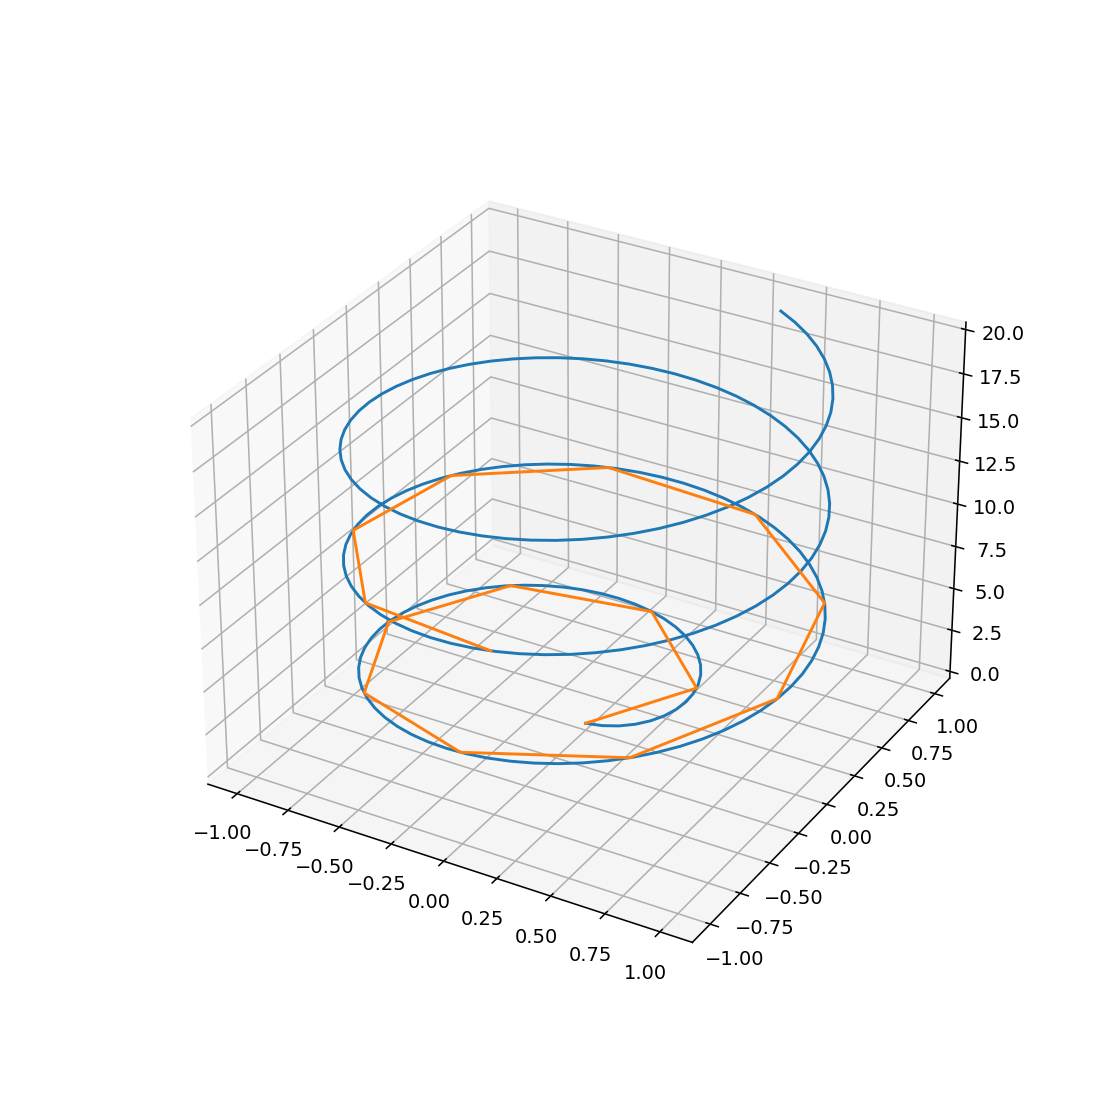

In [265]:
spiral = Spiral(1, 1, 0.8)
line_segment_points = SearchLineSegmentPoints(spiral, 0.001, [1.0]*15)
line_segment_points.calc_t()
print(line_segment_points.t_list)


t_list = np.linspace(0, 20, 200)
pos_list1 = {"x":[], "y":[], "z":[]}
pos_list2 = {"x":[], "y":[], "z":[]}
for t in t_list:
    pos = spiral.spiral_pos(t)
    pos_list1["x"].append(pos[0])
    pos_list1["y"].append(pos[1])
    pos_list1["z"].append(pos[2])

for t_ in line_segment_points.t_list:
    pos = spiral.spiral_pos(t_)
    pos_list2["x"].append(pos[0])
    pos_list2["y"].append(pos[1])
    pos_list2["z"].append(pos[2])

#plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(pos_list1["x"], pos_list1["y"], pos_list1["z"])
ax.plot(pos_list2["x"], pos_list2["y"], pos_list2["z"])

plt.savefig("testfig.png", dpi=300)

plt.show()
#fig = px.line_3d(x=pos_list1["x"], y=pos_list1["y"], z=pos_list1["z"], range_x=[-6,6], range_y=[-6,6],range_z=[0,12])
#fig.add_scatter3d(x=pos_list2["x"], y=pos_list2["y"], z=pos_list2["z"])
#fig.update_layout(scene_aspectmode='cube')
#fig.show()

### Paden-Kahan Subproblemsを使用した線分間のIK(ジョイント角度)の計算クラス&便利関数


In [424]:
#Paden-Kahan Subproblems1
def padenKahanSubproblem1(w, u, v):
    _u = u - (w.dot(w.T).dot(u))
    _v = v - (w.dot(w.T).dot(v))
    
    return np.arctan2(w.T.dot(np.cross(_u.T,_v.T).T), _u.T.dot(_v))

#Paden-Kahan Subproblems2
def padenKahanSubproblem2(w1, w2, p, q, r):
    #w_z0 = w1
    #w_y0 = w2
    #p = L1
    #q = Pd
    p = p -r
    q = q -r
    alpha = ((w1.T.dot(w2)).dot(w2.T).dot(p) - w1.T.dot(q) ) / (((w1.T.dot(w2))**2) - 1)
    alpha = alpha[0][0]
    beta = ((w1.T.dot(w2)).dot(w1.T).dot(q) - w2.T.dot(p) ) / (((w1.T.dot(w2))**2) - 1)
    beta = beta[0][0]
    ganma = (np.linalg.norm(p)**2) - (alpha**2) - (beta**2) - (2*alpha*beta*(w1.T.dot(w2))) / (np.linalg.norm(np.cross(w1.T, w2.T)))**2
    ganma = np.sqrt(ganma)
    ganma = ganma[0][0]
    z = alpha * w_z0 + beta * w_y0 + ganma*(np.cross(w_z0.T, w_y0.T).T)
    z2 = alpha * w_z0 + beta * w_y0 - ganma*(np.cross(w_z0.T, w_y0.T).T)
    shita_y = padenKahanSubproblem1(w2, p, z)
    shita_z = padenKahanSubproblem1(-1*w1, q, z)
    
    shita_y2 = padenKahanSubproblem1(w2, p, z2)
    shita_z2 = padenKahanSubproblem1(-1*w1, q, z2)
    return [{"z":shita_z[0][0], "y":shita_y[0][0]}, {"z":shita_z2[0][0], "y":shita_y2[0][0]}]


#ベクトルから歪対称行列を求める
def vec2skew(vec):
    return np.array([[0, -vec[2], vec[1]], 
                     [vec[2], 0, -vec[0]], 
                     [-vec[1], vec[0], 0]])
    
#歪対称行列からベクトルを求める
def skew2vec(skew_matrix):
    return np.array([skew_matrix[2][1], skew_matrix[0][2], skew_matrix[1][0]])

#twist行列の生成
def make_twist(w, q):
    v = np.cross(-w.T,q.T).T
    #print(v)
    #print(w.reshape(1,3))
    twist = np.block([[vec2skew(w.reshape(1,3)[0]), v],[0,0,0,0]])
    #print(twist)
    return twist


#joint pos 1d pos list
def joint_pos_creator(joint_pos):
    joint_pos_list = []
    for pos in joint_pos:
        joint_pos_list.append([0, 0, float(pos)])
    return joint_pos_list

#joint pos 
def joint_pos_creator2(link_list):
    joint_pos_list = []
    _pos = 0
    for link in link_list:
        joint_pos_list.append([0, 0, _pos])
        _pos += link[2]
    return joint_pos_list

def target_pos_creator(spiral, t_list):
    target_list = []
    for t in t_list[1:]:
        target_list.append(spiral.spiral_pos(t))
    return target_list

def link_list_creator(spiral, t_list):
    link_list = []
    for i in range(len(t_list)-1):
        link_list.append([0,0, np.linalg.norm(spiral.spiral_pos(t_list[i+1]) - spiral.spiral_pos(t_list[i]))])
    return link_list

class Joint:
    """
    ###this link have Zaxis - Yaxis joint###
    joint_pos:vector_3d or 3num list
    before_joint:before joint object
    """
    def __init__(self, joint_pos, before_joint=None): 
        self.wz = w_z0 = np.array([[0,0,1.0]]).T
        self.wy = np.array([[0,1.0,0]]).T
        self.q = np.array([joint_pos]).T
        self.g0 = self.init_homogeneous(self.q)
        self.angle_list = []
        self.before_joint = before_joint
    
    def init_homogeneous(self, q):
        return np.block([[np.eye(3), q],[0,0,0,1]])
    
    def calc_angles(self, link, target):
        if(not(self.before_joint is None)):
            target = self.before_joint.g0.dot(np.linalg.inv(self.before_joint.g)).dot(np.block([[target],[1]]))[:3,:]
            link = self.g0.dot(np.block([[link],[1]]))[:3,:]
            
        self.angle_list = padenKahanSubproblem2(self.wz, self.wy, link, target, self.q)
        
    def transformed_homogeneous(self, angle_index=1):
        e_z = expm(make_twist(self.wz, self.q)*self.angle_list[angle_index]["z"])
        e_y = expm(make_twist(self.wy, self.q)*self.angle_list[angle_index]["y"])
        
        #this is init joint
        if(self.before_joint is None):
            self.g = e_z.dot(e_y).dot(self.g0)
        else:
            self.g = self.before_joint.g.dot(np.linalg.inv(self.before_joint.g0)).dot(e_z).dot(e_y).dot(self.g0)
    
    def calc_all(self, link, target, angle_index=0):
        self.calc_angles(link, target)
        self.transformed_homogeneous(angle_index)
        

class LegMaster:
    """
    leg angle calc
    link_list: link length list list (3 element list)
    joint_pos_list: init joint position list (3 element list)
    target_list: target pos list. this calculated line segment pos(3 elemnt list)
    """
    def __init__(self, link_list, joint_pos_list, target_list):
        self.link_list = link_list
        self.joint_pos_list = joint_pos_list
        self.target_list = target_list
        self.joint_obj_list = []
    
    def calc_joint_obj(self):
        for i in range(len(self.joint_pos_list)):
            print("calc Num:",i)
            _before_joint_obj = None
            if(len(self.joint_obj_list) > 0):
                _before_joint_obj = self.joint_obj_list[-1]
            _joint_obj = Joint(self.joint_pos_list[i], _before_joint_obj)
            _link = np.array([self.link_list[i]]).T
            _target = self.target_list[i].reshape((3,1))
            _joint_obj.calc_all(_link, _target)
            self.joint_obj_list.append(_joint_obj)
    
    def show_joint_angles(self):
        for joint_number, joint_obj in enumerate(self.joint_obj_list):
            print("joint",joint_number, " : ", joint_obj.angle_list)

            
class PlotMaster:
    def __init__(self, ax):
        self.ax = ax
        self.O = np.array([0, 0, 0, 1])
        self.e1 = np.array([0.5, 0, 0, 1])
        self.e2 = np.array([0, 0.5, 0, 1])
        self.e3 = np.array([0, 0, 0.5, 1])
    
    def plot_frame(self, O, e1, e2, e3, colors, line_width):
        frame(self.ax, e1, O, colors[0], line_width) #x軸方向
        frame(self.ax, e2, O, colors[1], line_width) #y軸方向
        frame(self.ax, e3, O, colors[2], line_width) #z軸方向
    
    def plot_base(self):
        self.plot_frame(self.O, self.e1, self.e2, self.e3, ["r", "g", "b"], 2)
        
    def plot_frame_transformed(self, homogeneous_matrix):
        _O = homogeneous_matrix.dot(self.O)
        _e1 = homogeneous_matrix.dot(self.e1)
        _e2 = homogeneous_matrix.dot(self.e2)
        _e3 = homogeneous_matrix.dot(self.e3)
        self.plot_frame(_O, _e1, _e2, _e3, ["r", "g", "b"], 2)
            

[0, 1.6017368129916485, 2.8640751788419356, 4.047772057544547, 5.209787607903179, 6.365228317579774, 7.5186183867868035, 8.671363303939557, 9.8239046967688, 10.976381829268353, 12.128838666858394, 13.28128909429526, 14.433737497028696, 15.586185260236238, 16.73863282144162, 17.891080318842064, 19.04352779608891, 20.19597526696998, 21.348422735840344, 22.500870204075596, 23.65331767211024, 24.805765140081526, 25.958212608032795, 27.11066007597774, 28.26310754392069, 29.415555011863006, 30.568002479805124, 31.72044994774718, 32.87289741568922, 34.02534488363125, 35.177792351573274]
[[0, 0, 1.9999999999999998], [0, 0, 2.000000000000001], [0, 0, 2.0000000000000004], [0, 0, 2.0], [0, 0, 2.0], [0, 0, 1.9999999999999996], [0, 0, 2.0000000000000013], [0, 0, 2.0000000000000013], [0, 0, 2.0000000000000004], [0, 0, 1.9999999999999996], [0, 0, 2.0], [0, 0, 2.000000000000001], [0, 0, 2.000000000000001], [0, 0, 2.000000000000002], [0, 0, 2.0], [0, 0, 2.0000000000000013], [0, 0, 1.9999999999999978], 

<IPython.core.display.Javascript object>


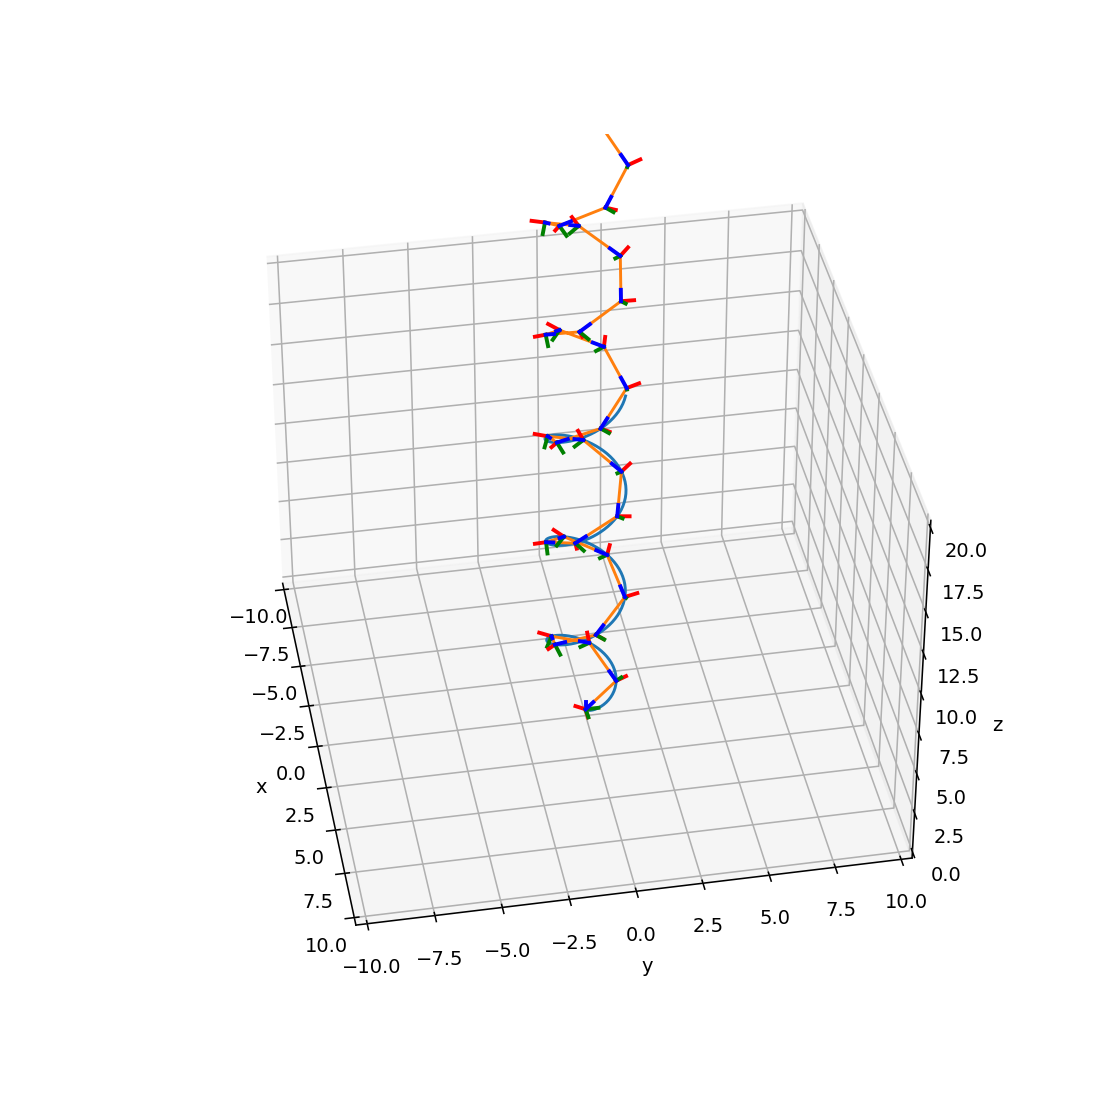

In [431]:
spiral = Spiral(1.5, 1.0, 1.0)
NUM_JOINT = 30
line_segment_points = SearchLineSegmentPoints(spiral, 0.0001, [2.0]*NUM_JOINT)
line_segment_points.calc_t()
print(line_segment_points.t_list)



link_list = link_list_creator(spiral, line_segment_points.t_list)
#link_list = [[0, 0, 1.0]]*NUM_JOINT
print(link_list)

target_list = target_pos_creator(spiral, line_segment_points.t_list)
print(target_list)

joint_pos_list = joint_pos_creator2(link_list)
print(joint_pos_list)

leg_master = LegMaster(link_list, joint_pos_list, target_list)
leg_master.calc_joint_obj()
leg_master.show_joint_angles()


#plot, homogeneous
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(0, 20)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

#spiral
t_list = np.linspace(0, 20, 200)
pos_list1 = {"x":[], "y":[], "z":[]}
pos_list2 = {"x":[], "y":[], "z":[]}
for t in t_list:
    pos = spiral.spiral_pos(t)
    pos_list1["x"].append(pos[0])
    pos_list1["y"].append(pos[1])
    pos_list1["z"].append(pos[2])
    
for t_ in line_segment_points.t_list:
    pos = spiral.spiral_pos(t_)
    pos_list2["x"].append(pos[0])
    pos_list2["y"].append(pos[1])
    pos_list2["z"].append(pos[2])

ax.plot(pos_list1["x"], pos_list1["y"], pos_list1["z"])
ax.plot(pos_list2["x"], pos_list2["y"], pos_list2["z"])


plotmaster = PlotMaster(ax)
plotmaster.plot_base()


for joint_obj in leg_master.joint_obj_list:
    plotmaster.plot_frame_transformed(joint_obj.g)
    
plt.savefig("testfig2.png", dpi=300)
plt.show()

In [359]:
joint_pos_creator(range(10))

# 屈曲角度と捩れ角度とリンク長からの螺旋の生成
このとき全てのジョイントにおける屈曲角度と捩れ角度は同じ

In [52]:
import math
import numpy as np
from scipy.linalg import logm, expm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib nbagg

def arrow(ax, v, sp, c):
    # 空間座標基準で矢印をプロットする
    # v:ベクトル、sp:始点、c:色
    return ax.quiver(sp[0], sp[1], sp[2],
              v[0]-sp[0], v[1]-sp[1], v[2]-sp[2],
              #length=np.linalg.norm(v),
              color=c, linewidth=1)

def frame(ax, v, sp, c, linewidth):
    return ax.plot([sp[0],v[0]], [sp[1], v[1]], [sp[2], v[2]], color=c, linewidth=linewidth)


#ベクトルから歪対称行列を求める
def vec2skew(vec):
    return np.array([[0, -vec[2], vec[1]], 
                     [vec[2], 0, -vec[0]], 
                     [-vec[1], vec[0], 0]])
    
#歪対称行列からベクトルを求める
def skew2vec(skew_matrix):
    return np.array([skew_matrix[2][1], skew_matrix[0][2], skew_matrix[1][0]])


def make_twist(w, q):
    v = np.cross(-w.T,q.T).T
    #print(v)
    #print(w.reshape(1,3))
    twist = np.block([[vec2skew(w.reshape(1,3)[0]), v],[0,0,0,0]])
    #print(twist)
    return twist

def make_g0(L):
    return np.array([[1,0,0,0],
                     [0,1,0,0],
                     [0,0,1,L],
                     [0,0,0,1]])



#joint pos 
def joint_pos_creator2(link_list):
    joint_pos_list = []
    _pos = 0
    for link in link_list:
        joint_pos_list.append([0, 0, _pos])
        _pos += link[2]
    return joint_pos_list

def link_list_creator(spiral, t_list):
    link_list = []
    for i in range(len(t_list)-1):
        link_list.append([0,0, np.linalg.norm(spiral.spiral_pos(t_list[i+1]) - spiral.spiral_pos(t_list[i]))])
    return link_list


class Joint:
    """
    ###this link have Zaxis - Yaxis joint###
    joint_pos:vector_3d or 3num list
    before_joint:before joint object
    """
    def __init__(self, joint_pos, angle_data, before_joint=None): 
        self.wz = w_z0 = np.array([[0,0,1.0]]).T
        self.wy = np.array([[0,1.0,0]]).T
        self.q = np.array([joint_pos]).T
        self.g0 = self.init_homogeneous(self.q)
        self.angle_list = [angle_data]
        self.before_joint = before_joint
    
    def init_homogeneous(self, q):
        return np.block([[np.eye(3), q],[0,0,0,1]])
    
    def calc_angles(self, link, target):
        if(not(self.before_joint is None)):
            target = self.before_joint.g0.dot(np.linalg.inv(self.before_joint.g)).dot(np.block([[target],[1]]))[:3,:]
            link = self.g0.dot(np.block([[link],[1]]))[:3,:]
            
        self.angle_list = padenKahanSubproblem2(self.wz, self.wy, link, target, self.q)
        
    def transformed_homogeneous(self, angle_index=1):
        e_z = expm(make_twist(self.wz, self.q)*self.angle_list[angle_index]["z"])
        e_y = expm(make_twist(self.wy, self.q)*self.angle_list[angle_index]["y"])
        
        #this is init joint
        if(self.before_joint is None):
            self.g = e_z.dot(e_y).dot(self.g0)
        else:
            self.g = self.before_joint.g.dot(np.linalg.inv(self.before_joint.g0)).dot(e_z).dot(e_y).dot(self.g0)
    
    def calc_all(self, angle_index=0):
        #self.calc_angles(link, target)
        self.transformed_homogeneous(angle_index)
        

class LegMaster:
    """
    leg angle calc
    link_list: link length list list (3 element list)
    joint_pos_list: init joint position list (3 element list)
    target_list: target pos list. this calculated line segment pos(3 elemnt list)
    angle_target : {"z":z_angle, "y":y_angle} rad
    """
    def __init__(self, link_list, joint_pos_list, angle_target):
        self.link_list = link_list
        self.joint_pos_list = joint_pos_list
        self.joint_obj_list = []
        self.angle_target = angle_target
    
    def calc_joint_obj(self):
        for i in range(len(self.joint_pos_list)):
            _before_joint_obj = None
            if(len(self.joint_obj_list) > 0):
                _before_joint_obj = self.joint_obj_list[-1]
            _joint_obj = Joint(self.joint_pos_list[i], self.angle_target, _before_joint_obj)
            _link = np.array([self.link_list[i]]).T
            _joint_obj.calc_all()
            self.joint_obj_list.append(_joint_obj)
    
    def show_joint_angles(self):
        for joint_number, joint_obj in enumerate(self.joint_obj_list):
            print("joint",joint_number, " : ", joint_obj.angle_list)
    
    def show_point_list(self):
        point_list = []
        for joint_obj in self.joint_obj_list:
            point_list.append(joint_obj.g.dot(np.array([0, 0, 0, 1])))
        return point_list
    def get_xyz_point_list(self):
        point_list_x = []
        point_list_y = []
        point_list_z = []
        
        for joint_obj in self.joint_obj_list:
            _point = joint_obj.g.dot(np.array([0, 0, 0, 1]))
            point_list_x.append(_point[0])
            point_list_y.append(_point[1])
            point_list_z.append(_point[2])
        return point_list_x, point_list_y, point_list_z
            
class PlotMaster:
    def __init__(self, ax):
        self.ax = ax
        self.O = np.array([0, 0, 0, 1])
        self.e1 = np.array([0.5, 0, 0, 1])
        self.e2 = np.array([0, 0.5, 0, 1])
        self.e3 = np.array([0, 0, 0.5, 1])
    
    def plot_frame(self, O, e1, e2, e3, colors, line_width):
        frame(self.ax, e1, O, colors[0], line_width) #x軸方向
        frame(self.ax, e2, O, colors[1], line_width) #y軸方向
        frame(self.ax, e3, O, colors[2], line_width) #z軸方向
    
    def plot_base(self):
        self.plot_frame(self.O, self.e1, self.e2, self.e3, ["r", "g", "b"], 2)
        
    def plot_frame_transformed(self, homogeneous_matrix):
        _O = homogeneous_matrix.dot(self.O)
        _e1 = homogeneous_matrix.dot(self.e1)
        _e2 = homogeneous_matrix.dot(self.e2)
        _e3 = homogeneous_matrix.dot(self.e3)
        self.plot_frame(_O, _e1, _e2, _e3, ["r", "g", "b"], 2)

def helix_curvature(L,l,n, r_deg): ##自然長, 測定した長さ, 関節数, ねじれ角度
    r_rad = math.radians(r_deg)
    sita = math.asin(l/L)
    x = L * math.cos(sita)
    a = (x * 10**-3) / (r_rad*n)
    b = (l * 10**-3) / (r_rad*n)
    k = a / (a**2 + b**2)
    return k

106.79309039861396
16.721875722064638


<IPython.core.display.Javascript object>


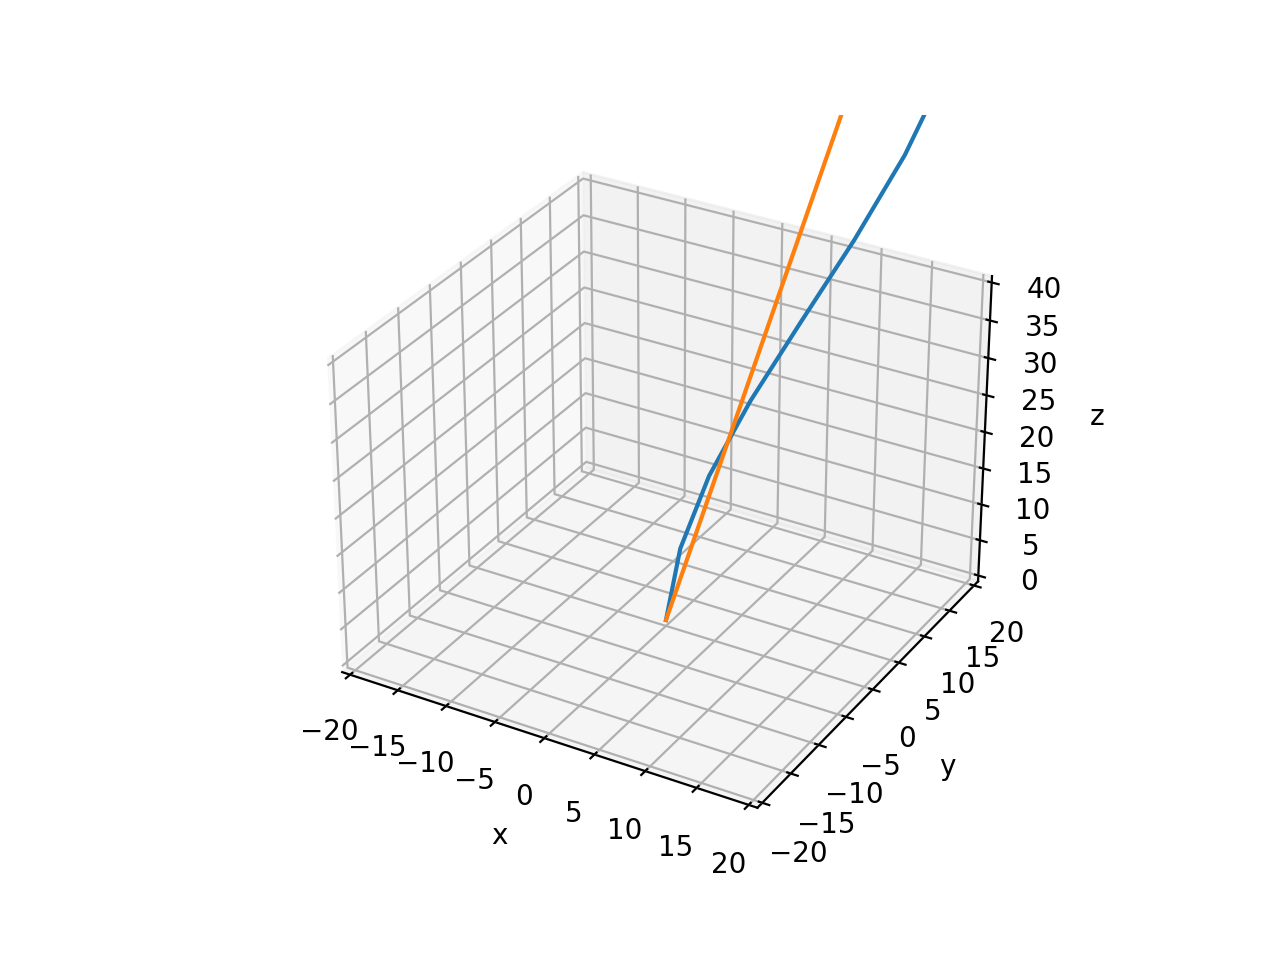

In [56]:

LINK_LEN = 10.2
NUM_JOINT = 12
Z_ANGLE_DEG = 20.0 #deg
Y_ANGLE_DEG = 7.22 #deg

target_angle_rad = {"z":math.radians(Z_ANGLE_DEG), "y":math.radians(Y_ANGLE_DEG)}
link_list = [[0, 0, LINK_LEN]]*NUM_JOINT
joint_pos_list = joint_pos_creator2(link_list)


leg_master = LegMaster(link_list, joint_pos_list, target_angle_rad)
leg_master.calc_joint_obj()

leg_px, leg_py, leg_pz = leg_master.get_xyz_point_list()


length = np.linalg.norm(np.array([leg_px[-1],leg_py[-1], leg_pz[-1]]))
print(length)

k = helix_curvature(LINK_LEN*NUM_JOINT, length, NUM_JOINT, Z_ANGLE_DEG)
print(k)
#plot, homogeneous
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_zlim(0, 40)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.plot(leg_px, leg_py, leg_pz)

ax.plot([leg_px[0],leg_px[-1]], [leg_py[0],leg_py[-1]], [leg_pz[0], leg_pz[-1]])

#plotmaster = PlotMaster(ax)
#plotmaster.plot_base()


#for joint_obj in leg_master.joint_obj_list:
#    plotmaster.plot_frame_transformed(joint_obj.g)
plt.show()

